In [32]:
from sklearn import cross_validation
from sklearn.datasets import load_boston

import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import seaborn as sns
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
sala= pd.read_csv('/Users/suzukishinji/Downloads/baseballdatabank-2017.1/core/Salaries.csv')
batt= pd.read_csv('/Users/suzukishinji/Downloads/baseballdatabank-2017.1/core/Batting.csv')
pitc= pd.read_csv('/Users/suzukishinji/Downloads/baseballdatabank-2017.1/core/Pitching.csv')
master= pd.read_csv('/Users/suzukishinji/Downloads/baseballdatabank-2017.1/core/Master.csv')

In [40]:
table3 = sala.groupby(['yearID','playerID','teamID']).count()
df = pd.DataFrame(table3) # DataFrameに変換
df[df['lgID']>1] 

,,,lgID,salary
yearID,playerID,teamID,,


In [41]:
table4 = sala.groupby(['yearID','playerID']).count()
df4 = pd.DataFrame(table4) # DataFrameに変換
df4[df4['lgID']>1]

teamID  lgID  salary
yearID playerID                       
1986   anderla02       2     2       2
       carltst01       2     2       2
       fostege01       2     2       2
       grosswa01       2     2       2
       johnto01        2     2       2
       mazzile01       2     2       2
       morenom01       2     2       2
       pastofr01       2     2       2
       slatoji01       2     2       2
       stefejo01       2     2       2
       thomago01       2     2       2
1987   barkele01       2     2       2
       berrada01       2     2       2
       bucknbi01       2     2       2
1988   kennete02       2     2       2
1989   quiseda01       2     2       2
1992   brantje01       2     2       2
       coxda01         2     2       2
       deleojo01       2     2       2
       fletcsc01       2     2       2
1993   boevejo01       2     2       2
       cadargr01       2     2       2
       caldeiv01       2     2       2
       gaettga01       2     2       2
       hatchbi01       2     2       2
       parrila02       2     2       2
       sandesc01       2     2       2
       seitzke01       2     2       2
       thompmi02       2     2       2
1994   gaettga01       2     2       2
...                  ...   ...     ...
1998   charlno01       2     2       2
       edmonbr01       2     2       2
       fieldce01       2     2       2
       fossato01       2     2       2
       gaettga01       2     2       2
       guilloz01       2     2       2
       incavpe01       2     2       2
       mormaal01       2     2       2
       olivejo01       2     2       2
       perezro01       2     2       2
       santaju01       2     2       2
       smallaa01       2     2       2
       tatisfe01       2     2       2
       telemam01       2     2       2
1999   brumfja01       2     2       2
       corsiji01       2     2       2
       fabrejo01       2     2       2
       figgami01       2     2       2
       maddumi01       2     2       2
       montgje01       2     2       2
       pooleji02       2     2       2
       reedje02        2     2       2
       rigbybr01       2     2       2
       slocuhe01       2     2       2
       wardtu01        2     2       2
       watsoal01       2     2       2
2000   wellsbo01       2     2       2
2010   taverwi01       2     2       2
2013   hernara02       2     2       2
2016   matzety01       2     2       2

[105 rows x 3 columns]

In [42]:
df4[df4['lgID']>1].count()

teamID    105
lgID      105
salary    105
dtype: int64

In [35]:
batt_sala= pd.merge(batt, sala,on=('playerID', "yearID","teamID"), how='inner')
pitc_sala= pd.merge(pitc, sala,on=('playerID', "yearID","teamID"), how='inner')
master_sala= pd.merge(master, sala,on=('playerID'), how='left')

In [27]:
batt_sala.corr()
#バッティングのデータと報酬のデータに関連性があるという前提で各項目の相関をみた。
#しかし、バティングデータ内での相関の高いものはあったが報酬ととりわけ高い項目は見当たらなかった。

,yearID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary
yearID,1.000000,-0.113910,-0.064317,-0.048600,-0.064488,-0.017148,-0.030243,-0.004471,-0.038901,-0.077134,-0.061741,-0.061829,0.002636,-0.044215,0.020712,-0.033258,-0.040548,-0.005102,0.333685
G,-0.113910,1.000000,0.842854,0.631468,0.738232,0.488711,0.198122,0.404373,0.571915,0.274274,0.219375,0.577572,0.655674,0.263282,0.249268,0.101055,0.222227,0.349311,0.075098
AB,-0.064317,0.842854,1.000000,0.736985,0.878332,0.583620,0.234461,0.473184,0.668286,0.330620,0.247407,0.608617,0.774336,0.259445,0.271925,0.123049,0.234314,0.416934,0.187088
R,-0.048600,0.631468,0.736985,1.000000,0.799540,0.550404,0.244111,0.644689,0.688565,0.345581,0.189874,0.624346,0.509048,0.298355,0.269352,0.069366,0.188114,0.274552,0.168392
H,-0.064488,0.738232,0.878332,0.799540,1.000000,0.668143,0.268480,0.540361,0.732745,0.337323,0.262590,0.561531,0.588593,0.264699,0.230877,0.086957,0.214164,0.333464,0.172923
2B,-0.017148,0.488711,0.583620,0.550404,0.668143,1.000000,0.112037,0.273493,0.498920,0.201202,0.142953,0.370769,0.402476,0.177994,0.169229,0.033774,0.145965,0.226784,0.135069
3B,-0.030243,0.198122,0.234461,0.244111,0.268480,0.112037,1.000000,0.080035,0.192969,0.127277,0.074085,0.132563,0.152630,0.047829,0.064687,0.036064,0.036845,0.074617,-0.004054
HR,-0.004471,0.404373,0.473184,0.644689,0.540361,0.273493,0.080035,1.000000,0.735497,0.103513,0.092673,0.405934,0.361923,0.253343,0.151048,-0.012746,0.130029,0.175203,0.144660
RBI,-0.038901,0.571915,0.668286,0.688565,0.732745,0.498920,0.192969,0.735497,1.000000,0.187313,0.151227,0.507811,0.479607,0.284718,0.189713,0.032806,0.329292,0.251518,0.166794
SB,-0.077134,0.274274,0.330620,0.345581,0.337323,0.201202,0.127277,0.103513,0.187313,1.000000,0.167859,0.277591,0.211119,0.100581,0.099190,0.085455,0.088459,0.094897,0.011848


In [21]:
pitc_sala.corr()
#ピッチングのデータと報酬のデータに関連性があるという前提で各項目の相関をみた。
#しかし、ピッチングデータ内での相関の高いものはあったが報酬ととりわけ高い項目は見当たらなかった。
#先発ピッチャーは高い

,yearID,W,L,G,GS,CG,SHO,SV,IPouts,H,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,salary
yearID,1.000000,-0.196484,-0.206509,0.032409,-0.280591,-0.476117,-0.200594,0.035054,-0.386268,-0.367676,...,-0.021182,-0.018468,-0.025833,-0.330023,-0.001249,-0.307515,-0.290668,-0.045337,-0.081498,0.296432
W,-0.196484,1.000000,-0.035904,0.153295,0.492892,0.527448,0.367453,-0.046308,0.630648,0.437395,...,0.102037,0.116060,0.004332,0.571214,-0.050977,0.183448,0.132261,0.064523,0.280404,0.131002
L,-0.206509,-0.035904,1.000000,0.077742,0.481855,0.246681,0.036660,-0.063079,0.391584,0.521395,...,0.091289,0.127365,0.027379,0.407023,-0.085471,0.621114,0.278780,0.135835,0.132196,0.122509
G,0.032409,0.153295,0.077742,1.000000,-0.059937,0.141815,0.056239,0.317520,0.217726,0.157568,...,0.070331,0.044529,0.005651,0.161171,0.457076,0.106710,0.085180,0.069372,0.076991,-0.167237
GS,-0.280591,0.492892,0.481855,-0.059937,1.000000,0.550964,0.288746,-0.161783,0.856497,0.830449,...,0.182850,0.225000,0.051931,0.869633,-0.355742,0.685322,0.317373,0.181856,0.379630,0.297296
CG,-0.476117,0.527448,0.246681,0.141815,0.550964,1.000000,0.507227,-0.047759,0.727399,0.584257,...,0.066660,0.086253,0.017008,0.626411,-0.109700,0.408708,0.308519,0.078245,0.232604,0.029848
SHO,-0.200594,0.367453,0.036660,0.056239,0.288746,0.507227,1.000000,-0.022885,0.386759,0.223573,...,0.024175,0.045628,-0.007458,0.336905,-0.061554,0.049992,0.083130,-0.011896,0.153439,0.044033
SV,0.035054,-0.046308,-0.063079,0.317520,-0.161783,-0.047759,-0.022885,1.000000,-0.032478,-0.086724,...,-0.024788,-0.017942,-0.017907,-0.049176,0.637814,-0.110080,-0.040418,-0.011659,-0.029988,0.020020
IPouts,-0.386268,0.630648,0.391584,0.217726,0.856497,0.727399,0.386759,-0.032478,1.000000,0.845638,...,0.182390,0.217775,0.046215,0.986165,-0.144053,0.597289,0.389811,0.184330,0.427278,0.239106
H,-0.367676,0.437395,0.521395,0.157568,0.830449,0.584257,0.223573,-0.086724,0.845638,1.000000,...,0.178938,0.205831,0.057497,0.887348,-0.193629,0.817341,0.378319,0.223181,0.400490,0.211885


In [23]:
master_sala.corr()
#選手の体格のデータと報酬のデータに関連性があるという前提で各項目の相関をみた。
#しかし、報酬ととりわけ高い項目は見当たらなかった。
#上記のデータ内で一番高いのはせいぜい「yearID」だった

,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay,weight,height,yearID,salary
birthYear,1.000000,-0.002875,0.016763,0.857608,0.015751,0.024233,0.507856,0.439957,0.900800,0.182806
birthMonth,-0.002875,1.000000,0.027790,0.003110,0.000417,0.005590,-0.016658,0.013459,-0.023482,0.010449
birthDay,0.016763,0.027790,1.000000,-0.006166,0.013622,-0.004352,0.009194,0.002734,0.007629,0.027143
deathYear,0.857608,0.003110,-0.006166,1.000000,0.000264,0.007215,0.310171,0.365742,0.222303,0.059337
deathMonth,0.015751,0.000417,0.013622,0.000264,1.000000,0.020358,0.017220,0.016729,-0.023526,-0.042834
deathDay,0.024233,0.005590,-0.004352,0.007215,0.020358,1.000000,0.023242,0.026331,0.215033,-0.029641
weight,0.507856,-0.016658,0.009194,0.310171,0.017220,0.023242,1.000000,0.633527,0.424069,0.194297
height,0.439957,0.013459,0.002734,0.365742,0.016729,0.026331,0.633527,1.000000,0.057538,0.074537
yearID,0.900800,-0.023482,0.007629,0.222303,-0.023526,0.215033,0.424069,0.057538,1.000000,0.351447
salary,0.182806,0.010449,0.027143,0.059337,-0.042834,-0.029641,0.194297,0.074537,0.351447,1.000000


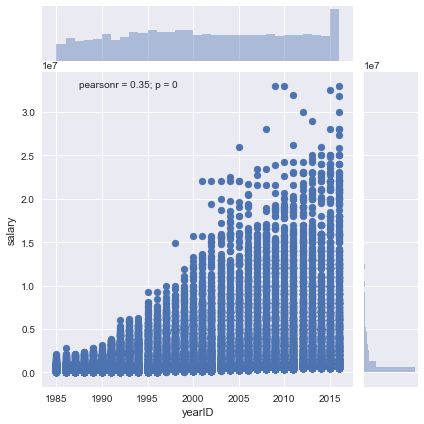

In [24]:
sns.jointplot(x = "yearID", y = "salary", data = sala);
#yearIDと報酬の関連性が高いため、年代別にプロットしてみた。結果、報酬が年々上がっていることがわかった。
#過去の成績の良い選手と現在の成績のイマイチの選手の報酬が同じため、相関が見えなかったのではないか

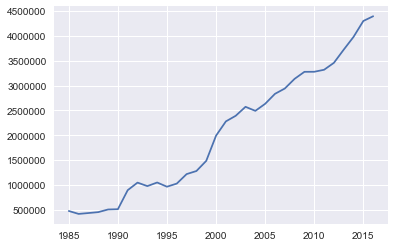

In [6]:
plt.plot(table1)
#平均値で年代別の報酬をみていても上昇が確認できる

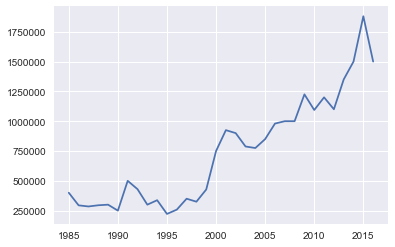

In [8]:
table2 = sala.groupby('yearID')['salary'].median()
plt.plot(table2)
#中央値で年代別の報酬をみていても上昇が確認できる

In [39]:
sala2015 = sala[sala["yearID"] == 2015]
batt2015= batt[batt["yearID"] == 2015]
batt_sala2015= pd.merge(batt2015, sala2015,on=('playerID', "yearID"), how='left')
bs = batt_sala2015.dropna(axis=0, how='any', inplace=False)
bs.corr()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary
yearID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stint,NaN,1.000000,-0.247355,-0.162757,-0.149732,-0.155270,-0.142715,-0.104024,-0.116016,-0.139008,-0.096691,-0.103907,-0.138032,-0.158885,-0.100821,-0.094246,-0.101997,-0.130975,-0.141539,0.055946
G,NaN,-0.247355,1.000000,0.923382,0.894724,0.912671,0.885796,0.618755,0.764416,0.873346,0.540691,0.612493,0.820480,0.864315,0.559068,0.642577,0.150873,0.750327,0.799808,0.148392
AB,NaN,-0.162757,0.923382,1.000000,0.968411,0.990691,0.958066,0.653816,0.820602,0.943866,0.592745,0.659018,0.872942,0.928311,0.590983,0.684810,0.184327,0.815699,0.866822,0.224513
R,NaN,-0.149732,0.894724,0.968411,1.000000,0.973765,0.950914,0.658797,0.868729,0.947708,0.624596,0.672762,0.909573,0.908716,0.614538,0.698733,0.137071,0.797617,0.822791,0.224553
H,NaN,-0.155270,0.912671,0.990691,0.973765,1.000000,0.963586,0.659844,0.815434,0.944108,0.611056,0.665562,0.869043,0.898073,0.611485,0.683280,0.153297,0.808130,0.863980,0.223621
2B,NaN,-0.142715,0.885796,0.958066,0.950914,0.963586,1.000000,0.616118,0.821619,0.936188,0.541027,0.613385,0.870481,0.882463,0.617369,0.679753,0.111958,0.812948,0.835887,0.216347
3B,NaN,-0.104024,0.618755,0.653816,0.658797,0.659844,0.616118,1.000000,0.423121,0.550393,0.621380,0.640121,0.511177,0.598555,0.257650,0.412351,0.209015,0.486082,0.465988,-0.010821
HR,NaN,-0.116016,0.764416,0.820602,0.868729,0.815434,0.821619,0.423121,1.000000,0.929686,0.348529,0.434889,0.850274,0.848625,0.652905,0.634865,-0.034587,0.738961,0.720123,0.261094
RBI,NaN,-0.139008,0.873346,0.943866,0.947708,0.944108,0.936188,0.550393,0.929686,1.000000,0.465246,0.525089,0.887258,0.898885,0.666682,0.678684,0.051757,0.844414,0.851811,0.264959


In [ ]:
sala2015 = sala[sala["yearID"] == 2015]
batt2015= batt[batt["yearID"] == 2015]
batt_sala2015= pd.merge(batt2015, sala2015,on=('playerID', "yearID"), how='left')
bs = batt_sala2015.dropna(axis=0, how='any', inplace=False)
bs.corr()